In [1]:
import ROOT as root
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random

Welcome to JupyROOT 6.28/04


In [2]:
triggerCode = '''
//auto fileName = "../rootfiles/output_geiger_30foils.root";
//auto treeName = "tree";

//TFile* f = new TFile((TString)fileName,"READ");
//TTree* t = (TTree*)f->Get(treeName);

bool getTrigger(double edep, double x, double y, double z) {
    if (edep > 0.05) {
        return true;
    } else {
    return false;
    }
}
'''

root.gInterpreter.Declare(triggerCode)

True

6 entries passed trigger
34 entries passed trigger
41 entries passed trigger
28 entries passed trigger
41 entries passed trigger
68 entries passed trigger
55 entries passed trigger
69 entries passed trigger
60 entries passed trigger
91 entries passed trigger
64 entries passed trigger


Info in <TCanvas::Print>: pdf file basic_plots_loop.pdf has been created


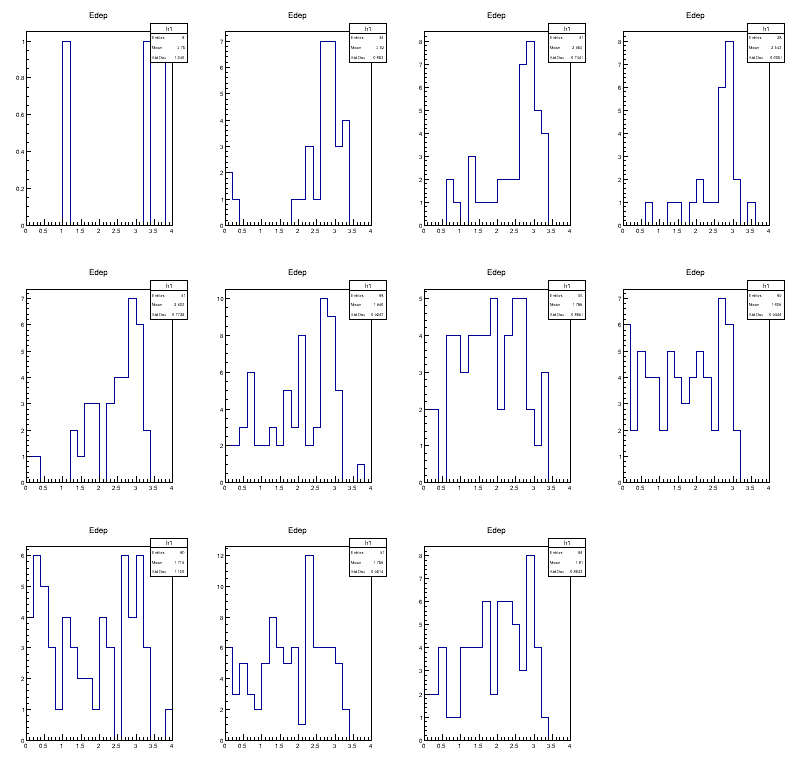

In [3]:
thickness = [0,1,2,4,8,12,16,20,24,28,32]

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(4,3,0.01,0.01,0)

hEdep = []
counts = []

for i in range(len(thickness)):

    fName = "../rootfiles/output_geiger_" + str(thickness[i]) + "foils.root"
    tName = "tree"

    f = root.TFile(fName)
    myTree = f.Get(tName)

    entries = myTree.GetEntriesFast()

    #myTree.Show(1)
    #myTree.Print()

    root.EnableImplicitMT()
    d = root.RDataFrame(tName,fName)

    fdf = d.Define("trigger", "getTrigger(energyDep, positionX, positionY, positionZ)")

    triggers = fdf.Filter("trigger==true").Count()
    print('{} entries passed trigger'.format(triggers.GetValue()))

    counts.append(triggers.GetValue())

    fdft = fdf.Filter("trigger==true")

    # Canvas 1
    hEdep.append(fdft.Histo1D(("h1", "Edep", 20, 0.0, 4.0),'energyDep'))
    #hXpos = fdft.Histo1D(("h2", "Xpos", 100, -10.0, 20.0),'positionX')
    #hYpos = fdft.Histo1D(("h3", "Ypos", 100, -10.0, 20.0),'positionY')
    #hZpos = fdft.Histo1D(("h4", "ZPos", 100, -10.0, 50.0),'positionZ')

    c1.cd(i+1)
    hEdep[i].Draw()
    #c1.cd(2)
    #hXpos.Draw()
    #c1.cd(3)
    #hYpos.Draw()
    #c1.cd(4)
    #hZpos.Draw()

    c1.Update()
    
c1.Print("basic_plots_loop.pdf");
c1.Draw()

6 entries passed trigger
34 entries passed trigger
43 entries passed trigger
41 entries passed trigger
68 entries passed trigger
71 entries passed trigger
70 entries passed trigger
86 entries passed trigger
83 entries passed trigger
78 entries passed trigger


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file basic_plots.pdf has been created


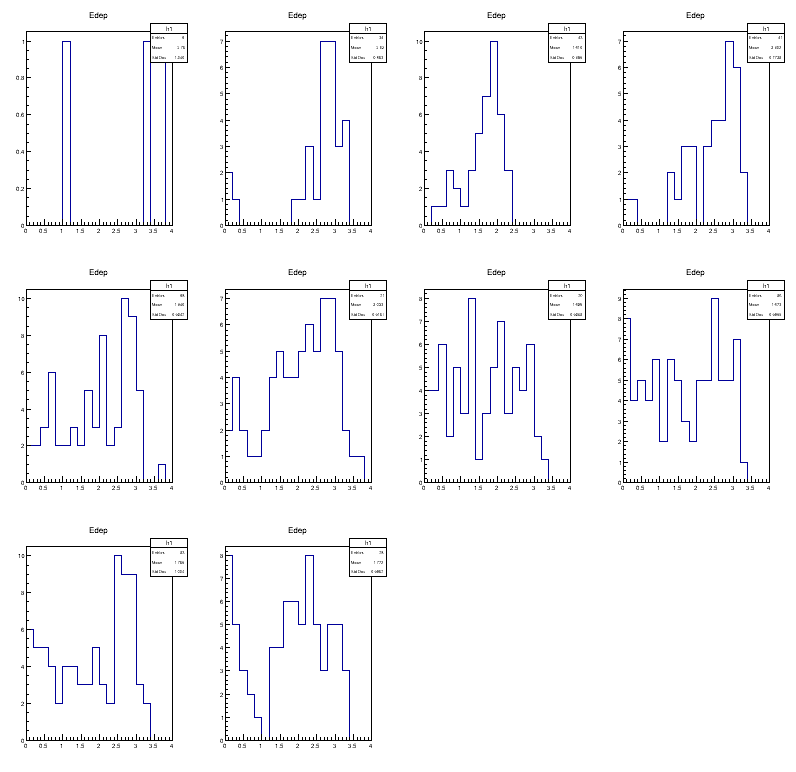

In [4]:
thickness2 = [0,1,4,8,12,15,22,30,40,52]

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(4,3,0.01,0.01,0)

hEdep = []
counts2 = []

for i in range(len(thickness2)):

    fName = "../rootfiles2/output_geiger_" + str(thickness2[i]) + "foils.root"
    tName = "tree"

    f = root.TFile(fName)
    myTree = f.Get(tName)

    entries = myTree.GetEntriesFast()

    #myTree.Show(1)
    #myTree.Print()

    root.EnableImplicitMT()
    d = root.RDataFrame(tName,fName)

    fdf = d.Define("trigger", "getTrigger(energyDep, positionX, positionY, positionZ)")

    triggers = fdf.Filter("trigger==true").Count()
    print('{} entries passed trigger'.format(triggers.GetValue()))

    counts2.append(triggers.GetValue())

    fdft = fdf.Filter("trigger==true")

    # Canvas 1
    hEdep.append(fdft.Histo1D(("h1", "Edep", 20, 0.0, 4.0),'energyDep'))
    #hXpos = fdft.Histo1D(("h2", "Xpos", 100, -10.0, 20.0),'positionX')
    #hYpos = fdft.Histo1D(("h3", "Ypos", 100, -10.0, 20.0),'positionY')
    #hZpos = fdft.Histo1D(("h4", "ZPos", 100, -10.0, 50.0),'positionZ')

    c1.cd(i+1)
    hEdep[i].Draw()
    #c1.cd(2)
    #hXpos.Draw()
    #c1.cd(3)
    #hYpos.Draw()
    #c1.cd(4)
    #hZpos.Draw()

    c1.Update()
    
c1.Print("basic_plots.pdf");
c1.Draw()

[79.60931194  0.15005386]
[[ 3.45814586e+01 -1.65948837e-01]
 [-1.65948837e-01  1.79543957e-03]]


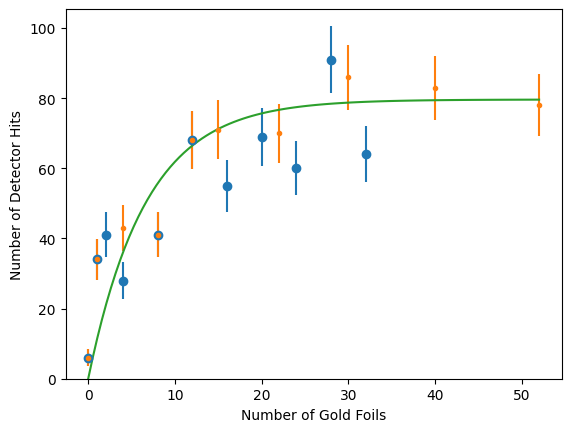

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ecounts = np.sqrt(counts)
ecounts2 = np.sqrt(counts2)

plt.errorbar(thickness,counts,ecounts,fmt='o')
plt.errorbar(thickness2,counts2,ecounts2,fmt='.')
plt.ylim(0)
plt.xlabel("Number of Gold Foils")
plt.ylabel("Number of Detector Hits")

def fitfunction(x,a,b):
    xp = np.array(x)
    return a*(1 - np.exp(-b*x))

x = np.array(thickness2)
y = np.array(counts2)

init_vals = [80.0,0.001]
popt, pcov = curve_fit(fitfunction, x, y, p0=init_vals)

print(popt)
print(pcov)

yfit = []
xfit = np.linspace(0.0,52.0,100)
for i in range (0,len(xfit)):
    yfit.append(fitfunction(xfit[i],*popt))

plt.plot(xfit,yfit)

plt.savefig("rutherford_thickness_dependence.pdf", format="pdf")
plt.show()